## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import warnings

warnings.filterwarnings('ignore')

## Import Dataset

In [3]:
data = 'pulsar_data_train.csv'

df = pd.read_csv(data)

## Explore Data Analysis

In [4]:
df.shape

(12528, 9)

In [5]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [6]:
col_names = df.columns

col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [9]:
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness',
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [10]:
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [11]:
df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [12]:
df['target_class'].value_counts()/np.float64(len(df))

0.0    0.907966
1.0    0.092034
Name: target_class, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          12528 non-null  float64
 1   IP Sd            12528 non-null  float64
 2   IP Kurtosis      10793 non-null  float64
 3   IP Skewness      12528 non-null  float64
 4   DM-SNR Mean      12528 non-null  float64
 5   DM-SNR Sd        11350 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  11903 non-null  float64
 8   target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB




> Explore missing values in variables



In [14]:
df.isnull().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64



> Find missing IP kurtosis

> To find missing values i use mean of the colums and fill the missing colums with the mean





In [15]:
mean_ipkurtosis = df['IP Kurtosis'].mean()
df['IP Kurtosis'] = df['IP Kurtosis'].fillna(mean_ipkurtosis)
df['IP Kurtosis'].isna().sum()

0



> Find missing DM-SNR Sd

> To find missing values i use mean of the colums and fill the missing colums with the mean





In [16]:
mean_DMSNRSd = df['DM-SNR Sd'].mean()
df['DM-SNR Sd'] = df['DM-SNR Sd'].fillna(mean_DMSNRSd)
df['DM-SNR Sd'].isna().sum()

0




> Find missing DM-SNR Skewness

> To find missing values i use mean of the colums and fill the missing colums with the mean







In [17]:
mean_DMSNRSkewness = df['DM-SNR Skewness'].mean()
df['DM-SNR Skewness'] = df['DM-SNR Skewness'].fillna(mean_DMSNRSkewness)
df['DM-SNR Skewness'].isna().sum()

0



> Check again if there is missing values



In [18]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [19]:
round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00
mean,111.04,46.52,0.48,1.78,12.67,26.35,8.33,105.53,0.09
std,25.67,6.80,0.99,6.21,29.61,18.67,4.54,104.69,0.29
min,5.81,24.77,-1.74,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.87,42.36,0.06,-0.19,1.91,14.76,5.80,38.13,0.00
50%,115.18,46.93,0.29,0.20,2.79,19.62,8.45,87.80,0.00
75%,127.11,50.98,0.48,0.93,5.41,26.47,10.73,135.77,0.00
max,189.73,91.81,8.07,68.10,222.42,110.64,34.54,1191.00,1.00


Text(0, 0.5, 'DM-SNR Skewness')

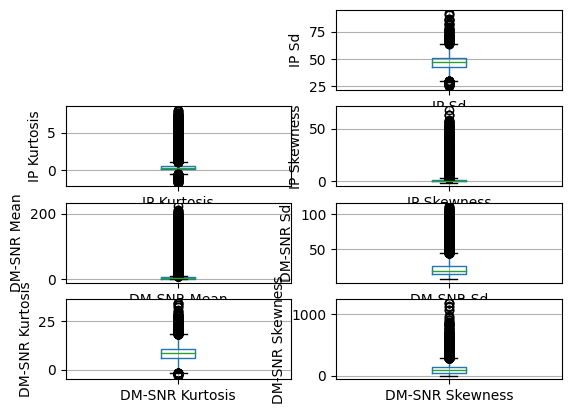

In [20]:

plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')



> Check the distribution of variables



Text(0, 0.5, 'Number of pulsar stars')

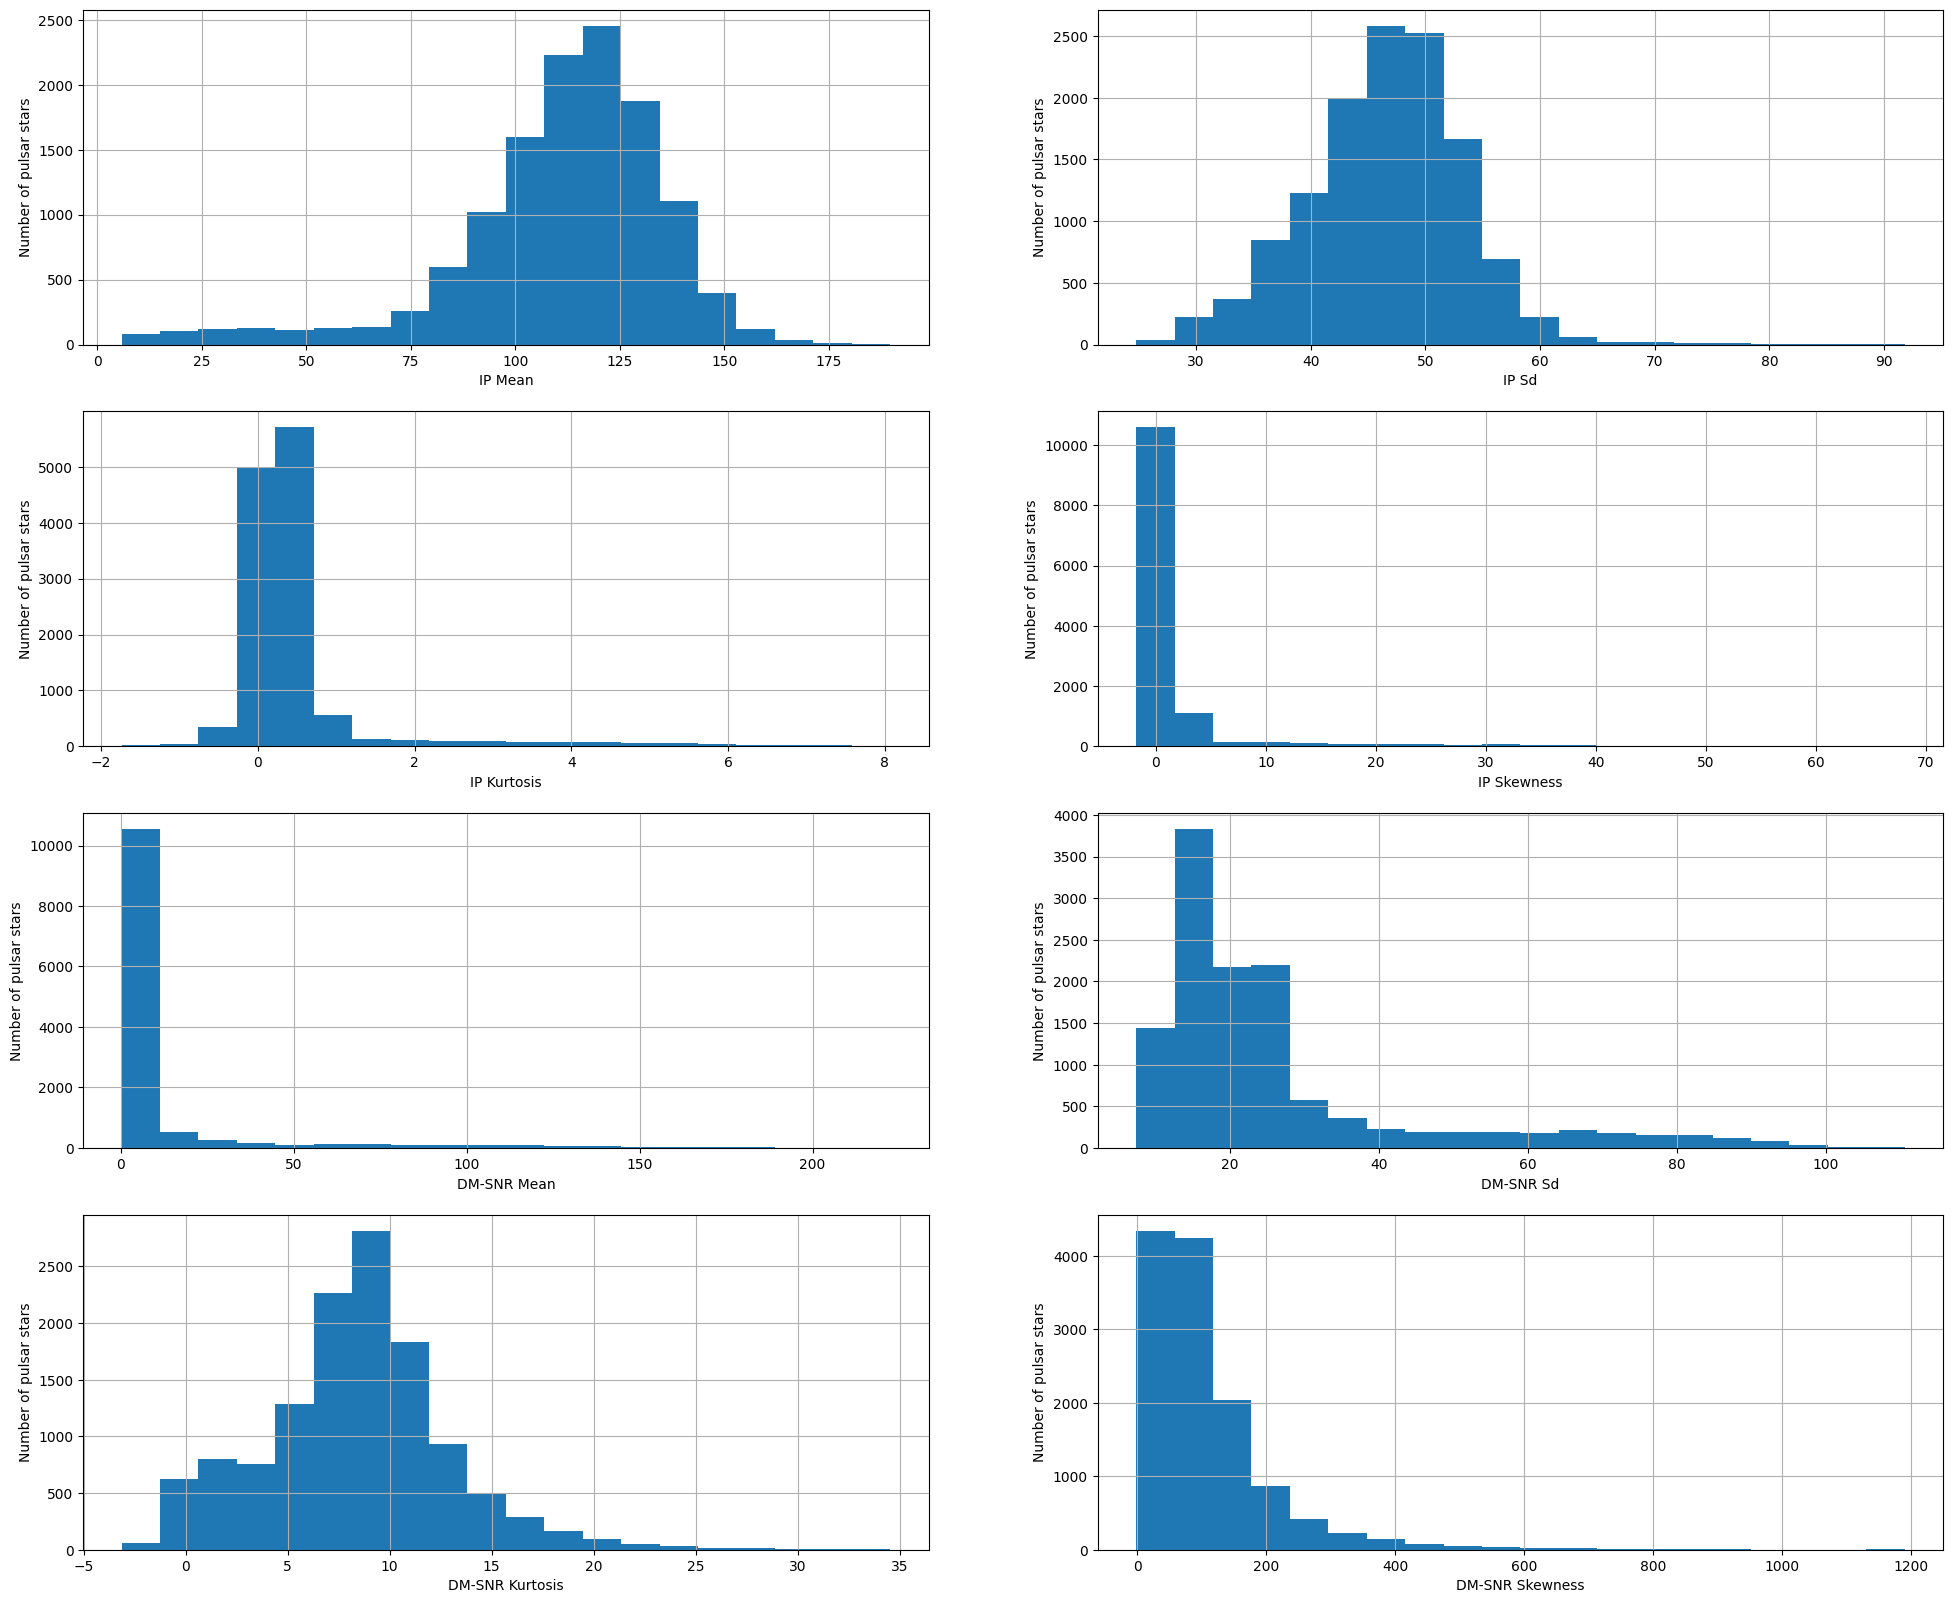

In [21]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

## Declare feature vector and target variable

In [22]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

## Split data into separate training and test set

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
X_train.shape, X_test.shape

((10022, 8), (2506, 8))

## Feature Scaling

In [25]:
cols = X_train.columns

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [27]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [28]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [29]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04
mean,-2.580698e-16,-7.770453e-16,-9.925762e-18,-1.595212e-17,-3.030902e-17,1.036888e-16,-1.318708e-16,-5.955457e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-4.059253e+00,-3.121855e+00,-2.221072e+00,-5.703669e-01,-4.225211e-01,-1.014727e+00,-2.526379e+00,-1.026846e+00
25%,-3.943394e-01,-6.101706e-01,-4.261366e-01,-3.175801e-01,-3.653436e-01,-6.205702e-01,-5.589324e-01,-6.456738e-01
50%,1.619199e-01,5.986146e-02,-1.916573e-01,-2.549120e-01,-3.355278e-01,-3.625238e-01,2.442155e-02,-1.680021e-01
75%,6.265131e-01,6.579129e-01,-6.261144e-03,-1.397269e-01,-2.459675e-01,1.653286e-02,5.276848e-01,2.883008e-01
max,3.045294e+00,6.647182e+00,7.578695e+00,1.045442e+01,7.074053e+00,4.496240e+00,5.769814e+00,1.036456e+01


## Run SVM with default hyperparameters

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9796



Run SVM with rbf kernel and C=100.0

We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.



In [31]:
svc=SVC(C=100.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9804


Run SVM with rbf kernel and C=1000.0

In [32]:
svc=SVC(C=1000.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9808


In this case, we can see that the accuracy had decreased with C=1000.0

## Run SVM with linear kernel

Run SVM with linear kernel and C=1.0

In [33]:
linear_svc=SVC(kernel='linear', C=1.0)
linear_svc.fit(X_train,y_train)
y_pred_test=linear_svc.predict(X_test)

print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9777


Run SVM with linear kernel and C=100.0

In [34]:
linear_svc100=SVC(kernel='linear', C=100.0)
linear_svc100.fit(X_train, y_train)
y_pred=linear_svc100.predict(X_test)

print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9777


Run SVM with linear kernel and C=1000.0

In [35]:
linear_svc1000=SVC(kernel='linear', C=1000.0)
linear_svc1000.fit(X_train, y_train)
y_pred=linear_svc1000.predict(X_test)

print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9781


We can see that we can see accuracy with C=100.0 and C=1000.0 and C=1.0 is in the same accuracy

Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.



> Compare the train-set and test-set accuracy



In [36]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0., 0., 0., ..., 1., 0., 0.])

In [37]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9756


We can see that the training set and test-set accuracy are very much comparable.



> Check for overfitting and underfitting



In [38]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9756
Test set score: 0.9777


The training-set accuracy score is 0.9756 while the test-set accuracy to be 0.9777. These two values are quite comparable. So, there is no question of overfitting.



> Compare model accuracy with null accuracy



So, the model accuracy is 0.9777. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [39]:
y_test.value_counts()

0.0    2285
1.0     221
Name: target_class, dtype: int64

We can see that the occurences of most frequent class 0 is 2285. So, we can calculate null accuracy by dividing 3306 by total number of occurences.

In [40]:
null_accuracy = (2285/(2285+221))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9118


We can see that our model accuracy score is 0.9777 but null accuracy score is 0.9118. So, we can conclude that our SVM classifier is doing a very good job in predicting the class labels.

## Run SVM with polynomial kernel

Run SVM with polynomial kernel and C=1.0

In [41]:
poly_svc=SVC(kernel='poly', C=1.0)
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)

print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9749


Run SVM with polynomial kernel and C=100.0

In [42]:
poly_svc100=SVC(kernel='poly', C=100.0)
poly_svc100.fit(X_train, y_train)
y_pred=poly_svc100.predict(X_test)

print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9792


Run SVM with polynomial kernel and C=1000.0

In [43]:
poly_svc100=SVC(kernel='poly', C=1000.0)
poly_svc100.fit(X_train, y_train)
y_pred=poly_svc100.predict(X_test)

print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9792


Polynomial kernel gives more accuracy

## Run SVM with sigmoid kernel

Run SVM with sigmoid kernel and C=1.0

In [44]:
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)
sigmoid_svc.fit(X_train,y_train)
y_pred=sigmoid_svc.predict(X_test)

print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8767


Run SVM with sigmoid kernel and C=100.0

In [45]:
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0)
sigmoid_svc100.fit(X_train,y_train)
y_pred=sigmoid_svc100.predict(X_test)

print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8767


Run SVM with sigmoid kernel and C=1000.0

In [46]:
sigmoid_svc100=SVC(kernel='sigmoid', C=1000.0)
sigmoid_svc100.fit(X_train,y_train)
y_pred=sigmoid_svc100.predict(X_test)

print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8767


We can see that sigmoid kernel is also performing better just like with polynomial kernel.

## Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2276    9]
 [  47  174]]

True Positives(TP) =  2276

True Negatives(TN) =  174

False Positives(FP) =  9

False Negatives(FN) =  47


The confusion matrix shows 2276 + 174 = 2450 correct predictions and 9 + 47 = 56 incorrect predictions.

In this case, we have


> True Positives (Actual Positive:1 and Predict Positive:1) - 2276

> True Negatives (Actual Negative:0 and Predict Negative:0) - 174

> False Positives (Actual Negative:0 but Predict Positive:1) - 9 (Type I error)

> False Negatives (Actual Positive:1 but Predict Negative:0) - 47 (Type II error)


<Axes: >

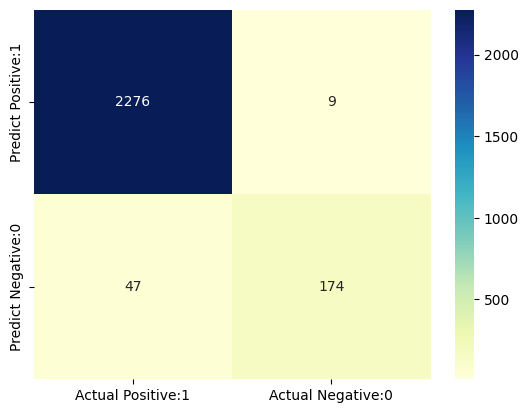

In [48]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification metrices

Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2285
         1.0       0.95      0.79      0.86       221

    accuracy                           0.98      2506
   macro avg       0.97      0.89      0.92      2506
weighted avg       0.98      0.98      0.98      2506



Classification accuracy

In [50]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [51]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9777


Classification error

In [52]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0223



> Precision


Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [53]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9961




> Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be defined as the ratio of TP to (TP + FN)

In [54]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9798




> True Positive Rate


True Positive Rate is synonymous with Recall.

In [55]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9798




> False Positive Rate



In [56]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0492




> Specificity



In [57]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9508




> f1-score


f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.



> Support


Support is the actual number of occurrences of the class in our dataset.

## ROC - AUC



> ROC Curve


Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

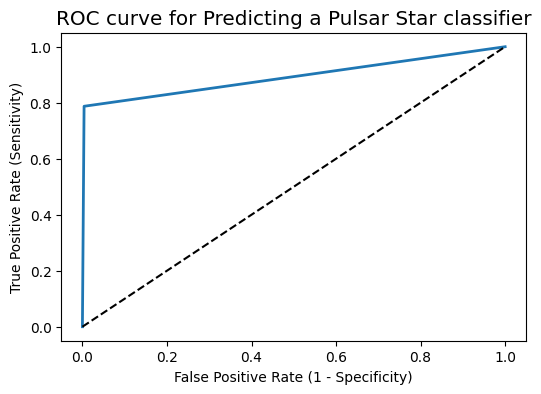

In [58]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

ROC AUC

ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.



So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [59]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8917


Comments



*   ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.
*   ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.

In [60]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9686


## Stratified k-fold Cross Validation with shuffle split

k-fold cross-validation is a very useful technique to evaluate model performance. But, it fails here because we have a imbalnced dataset. So, in the case of imbalanced dataset, I will use another technique to evaluate model performance. It is called stratified k-fold cross-validation.

In stratified k-fold cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset.

Moreover, I will shuffle the data before splitting because shuffling yields much better result.

Stratified k-Fold Cross Validation with shuffle split with linear kernel

In [61]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)

linear_svc=SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [62]:
print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.97765363 0.97805267 0.97605746 0.9748503  0.97644711]


In [63]:
print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.9766


Stratified k-Fold Cross Validation with shuffle split with rbf kernel

In [64]:
rbf_svc=SVC(kernel='rbf')

rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [65]:
print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[0.97326417 0.97286512 0.9688747  0.97205589 0.96886228]


In [66]:
print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9712


Comments

I obtain higher average stratified k-fold cross-validation score of 0.9766 with linear kernel but the model accuracy is 0.9777. So, stratified cross-validation technique does not help to improve the model performance.

## Hyperparameter Optimization using GridSearch CV

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc=SVC()
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [68]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9786


Parameters that give the best results : 

 {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, gamma=0.2)


In [69]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9804
